# Hands-On Data Preprocessing in Python
Learn how to effectively prepare data for successful data analytics
    
    AUTHOR: Dr. Roy Jafari 

# Chapter 5: Data Visualization 

## Summarizing a population
### Example of summarizing numerical attributes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

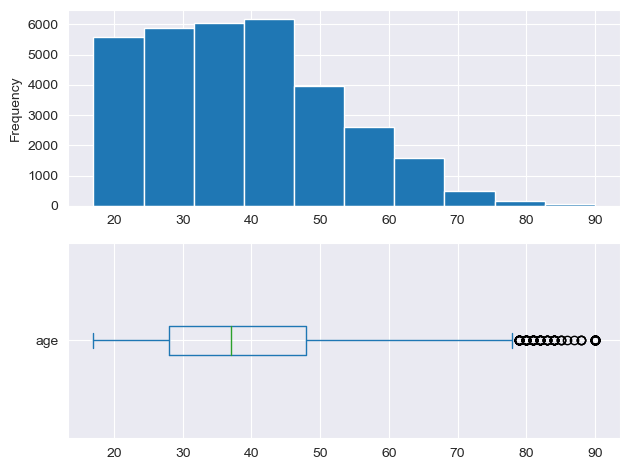

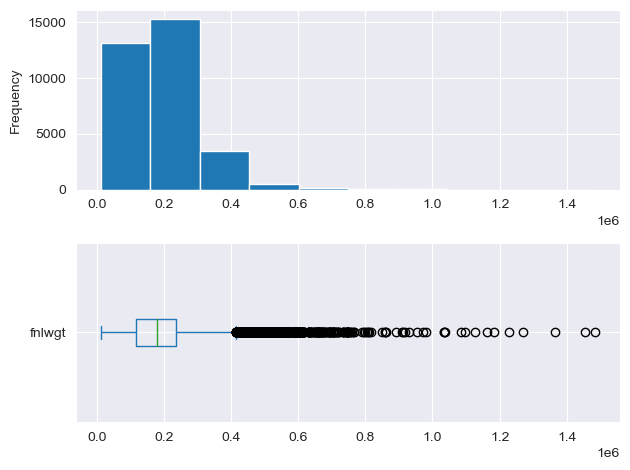

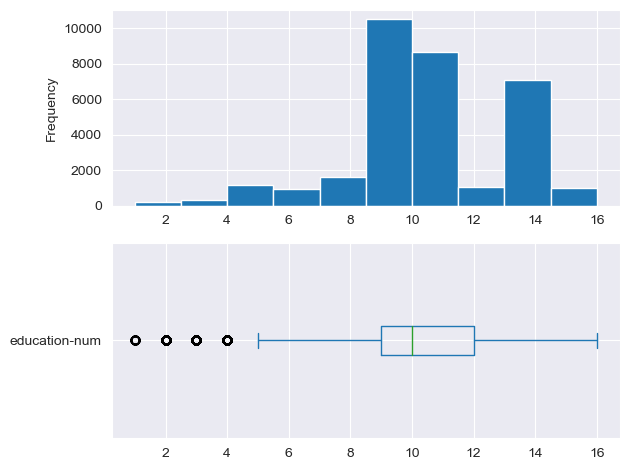

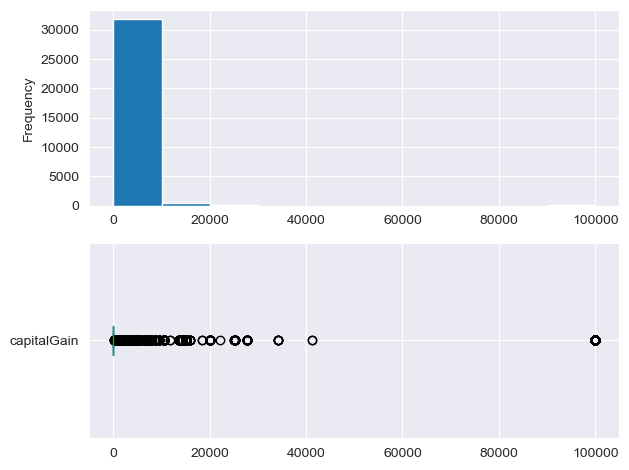

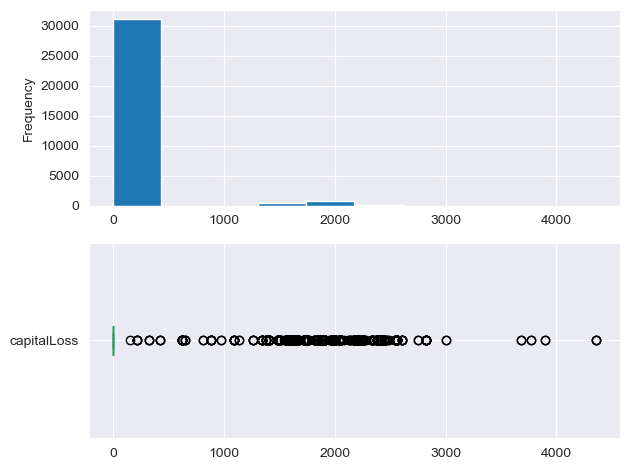

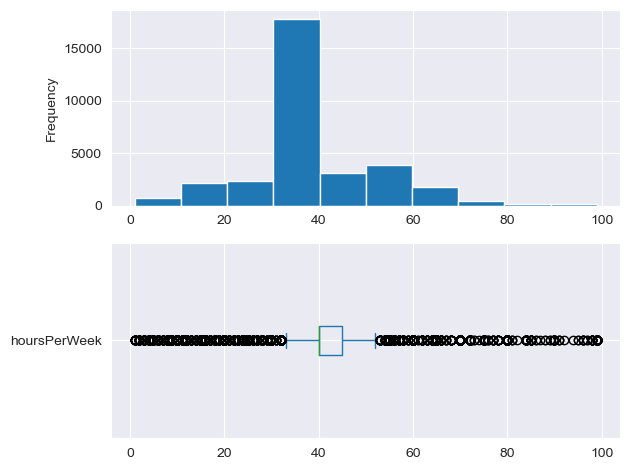

In [2]:
adult_df = pd.read_csv('adult.csv')

numerical_attributes = ['age', 'fnlwgt', 'education-num', 'capitalGain', 'capitalLoss',
       'hoursPerWeek']

for att in numerical_attributes:
    plt.subplot(2,1,1)
    adult_df[att].plot.hist()
    plt.subplot(2,1,2)
    adult_df[att].plot.box(vert=False)
    plt.tight_layout()
    plt.savefig('{}.png'.format(att), dpi=600)
    plt.show()

### Example of summarizing categorical attributes

In [5]:
adult_df['education'].value_counts()

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

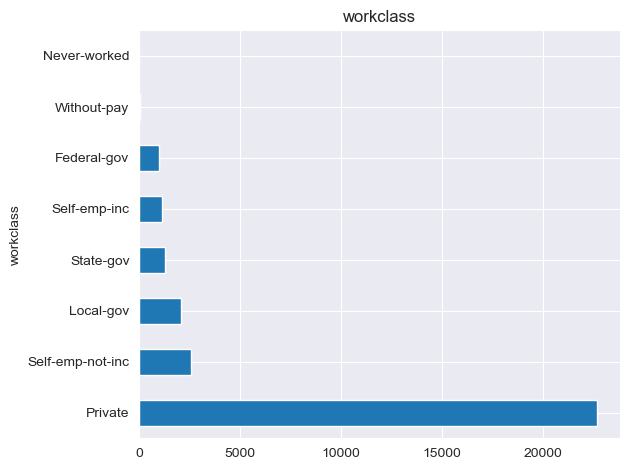

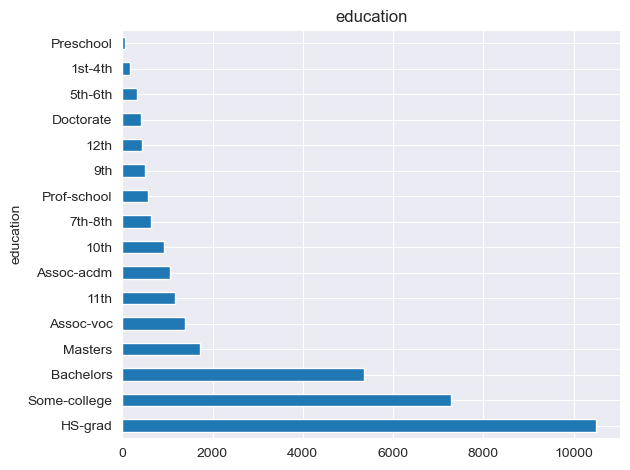

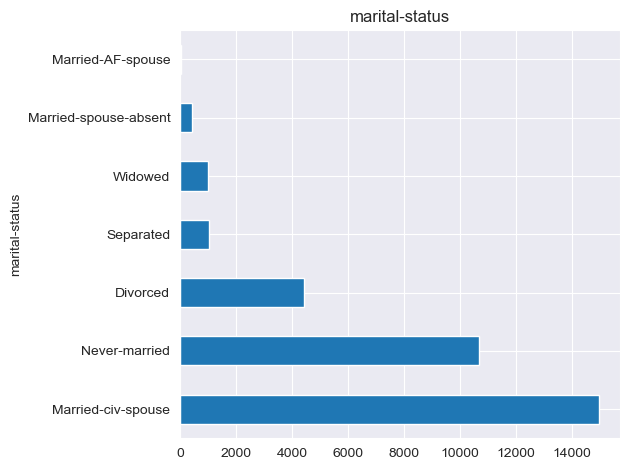

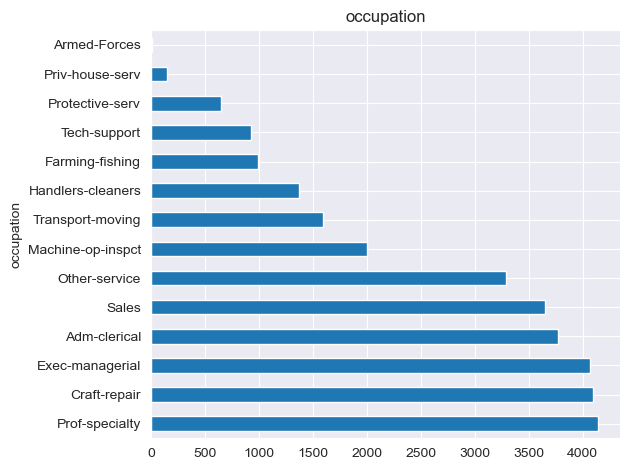

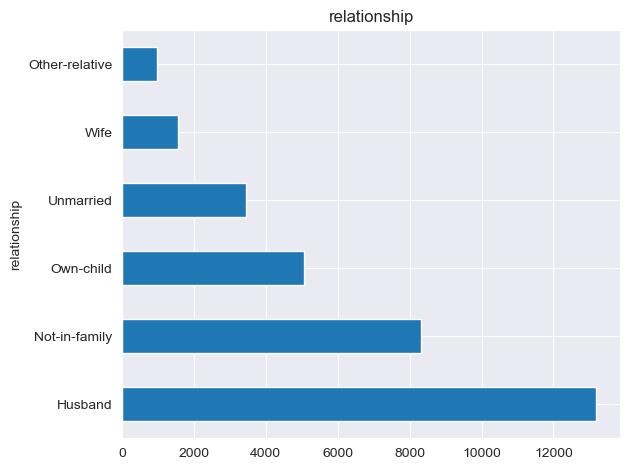

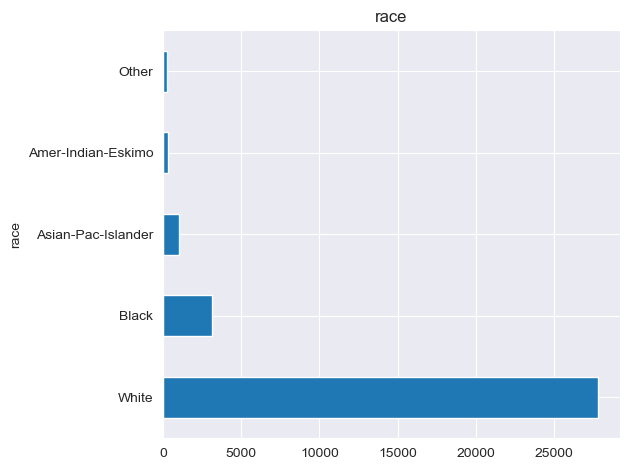

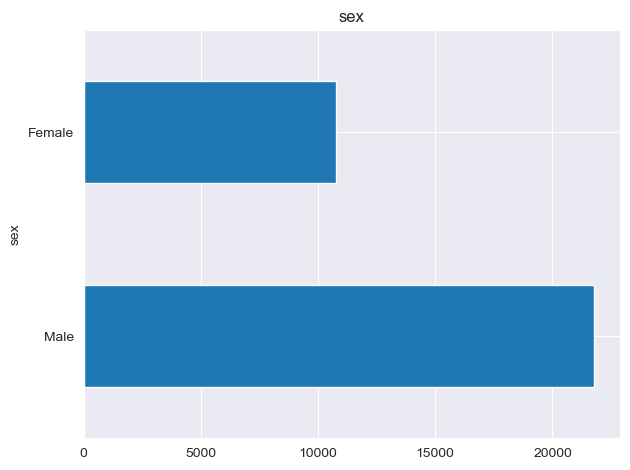

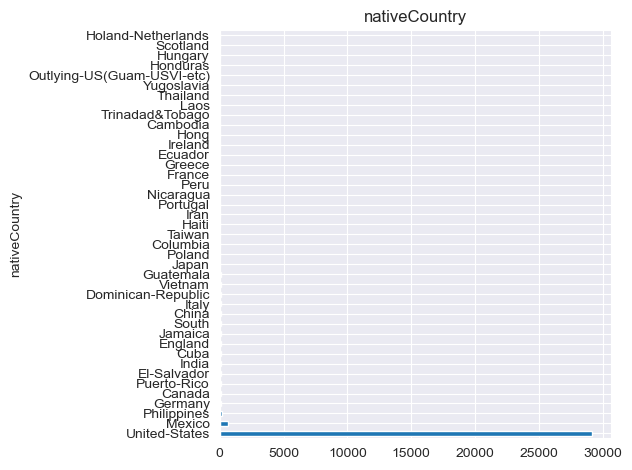

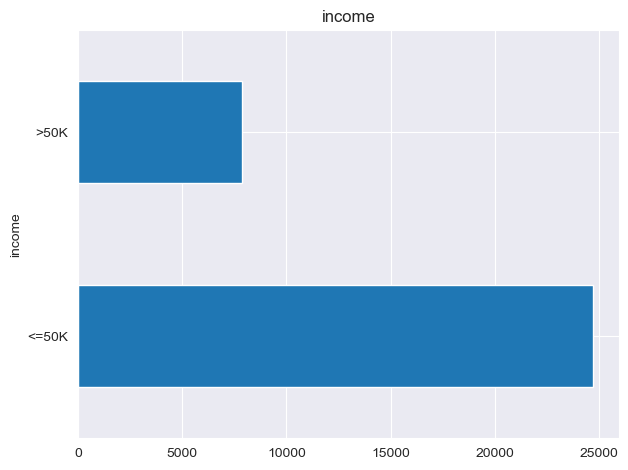

In [3]:
categorical_attributes = ['workclass', 'education', 'marital-status', 
                          'occupation', 'relationship', 'race',
                         'sex','nativeCountry','income']

for att in categorical_attributes:
    adult_df[att].value_counts().plot.barh()
    plt.title(att)
    plt.tight_layout()
    plt.savefig('{}.png'.format(att), dpi=600)
    plt.show()

## Comparing populations
### Example of comparing populations using boxplots

In [7]:
income_possibilities = adult_df.income.unique()
income_possibilities

array(['<=50K', '>50K'], dtype=object)

In [10]:
box_sr = pd.Series('',index = income_possibilities)
box_sr

<=50K    
>50K     
dtype: object

In [13]:
for poss in income_possibilities:
    BM = adult_df.income == poss
    print(BM.head())

0    True
1    True
2    True
3    True
4    True
Name: income, dtype: bool
0    False
1    False
2    False
3    False
4    False
Name: income, dtype: bool


In [14]:
income_possibilities = adult_df.income.unique()

box_sr = pd.Series('',index = income_possibilities)

for poss in income_possibilities:
    BM = adult_df.income == poss
    box_sr[poss] = adult_df[BM]['education-num']
box_sr    

<=50K    0        13
1        13
2         9
3         ...
>50K     7         9
8        14
9        13
10       1...
dtype: object

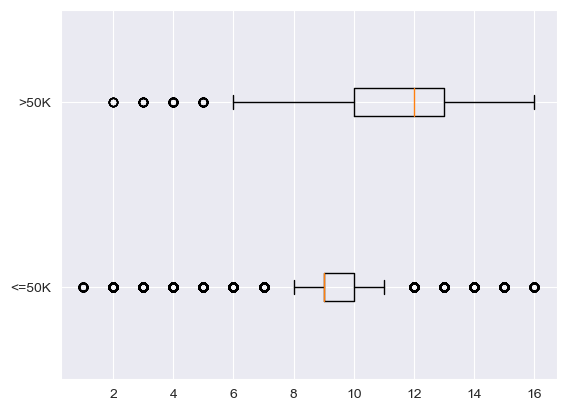

In [19]:
plt.boxplot(box_sr,vert=False)
plt.yticks([1,2],income_possibilities)
plt.show()

In [24]:
adult_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [27]:
income_possibilities = adult_df.income.unique()

poss = income_possibilities[0]
BM = adult_df.income == poss
adult_df[BM]['education-num']

0        13
1        13
2         9
3         7
4        13
         ..
32553    14
32555    10
32556    12
32558     9
32559     9
Name: education-num, Length: 24720, dtype: int64

In [54]:
income_possibilities = adult_df.income.unique()

dataForBox_dic= {}

for poss in income_possibilities:
    BM = adult_df.income == poss
    dataForBox_dic[poss] = adult_df[BM]['education-num']
dataForBox_dic    

{'<=50K': 0        13
 1        13
 2         9
 3         7
 4        13
          ..
 32553    14
 32555    10
 32556    12
 32558     9
 32559     9
 Name: education-num, Length: 24720, dtype: int64,
 '>50K': 7         9
 8        14
 9        13
 10       10
 11       13
          ..
 32539    16
 32545    12
 32554    14
 32557     9
 32560     9
 Name: education-num, Length: 7841, dtype: int64}

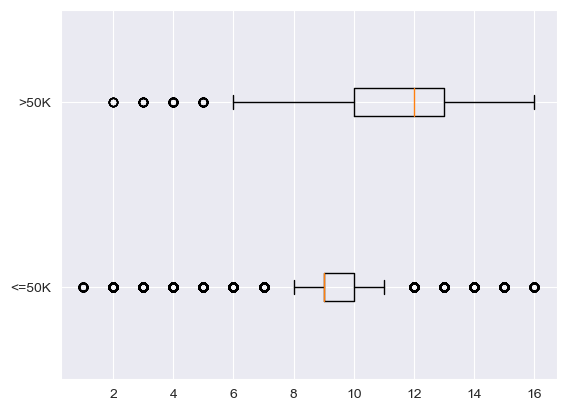

In [55]:
plt.boxplot(dataForBox_dic.values(),vert=False)
plt.yticks([1,2],income_possibilities)
plt.show()

### Example of comparing populations using histograms

In [46]:
len(adult_df.income)

32561

In [50]:
income_possibilities = adult_df.income.unique()
dataForBox = pd.DataFrame(index=range(1,len(adult_df.income)+1))
# dataForBox.set_index(range(1,len(adult_df.income)+1))
for poss in income_possibilities:
    BM = adult_df.income == poss
    dataForBox[poss] = adult_df[BM]['education-num']
    # print(adult_df[BM]['education-num'].head())
# dataForBox
# print(dataForBox.head(10))
dataForBox

,<=50K,>50K
1,13.0,NaN
2,9.0,NaN
3,7.0,NaN
4,13.0,NaN
5,14.0,NaN
...,...,...
32557,NaN,9.0
32558,9.0,NaN
32559,9.0,NaN
32560,NaN,9.0


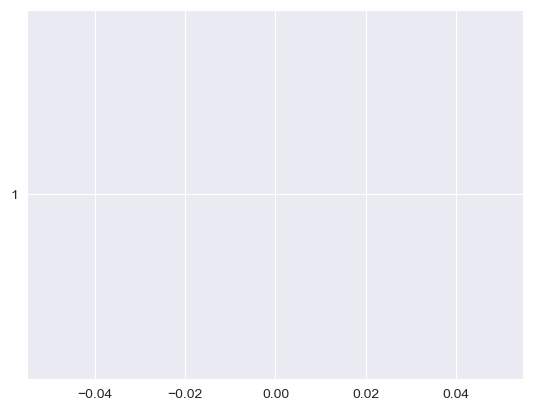

In [56]:
plt.boxplot(dataForBox['>50K'], vert=False)
plt.show()

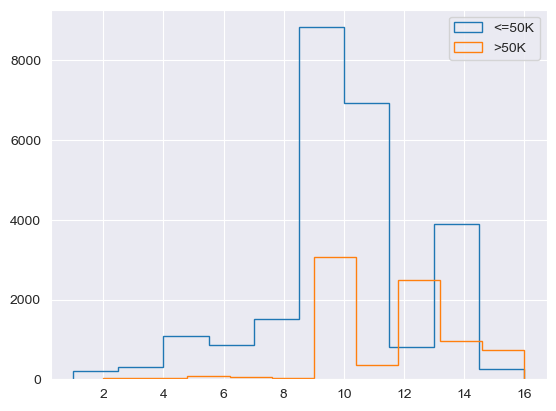

In [31]:
income_possibilities = adult_df.income.unique()

for poss in income_possibilities:
    BM = adult_df.income == poss
    plt.hist(adult_df[BM]['education-num'],
             histtype='step',label=poss)
plt.legend()
plt.show()

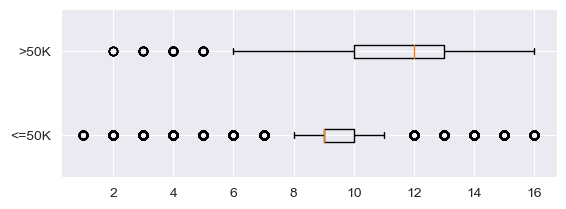

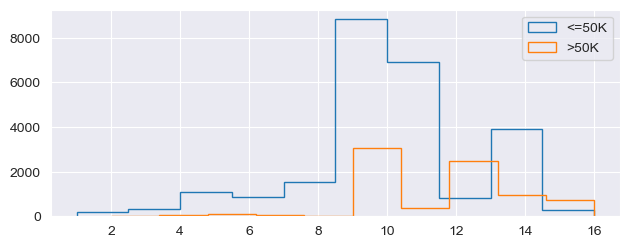

In [57]:
income_possibilities = adult_df.income.unique()

dataForBox_dic= {}

for poss in income_possibilities:
    BM = adult_df.income == poss
    dataForBox_dic[poss] = adult_df[BM]['education-num']

plt.subplot(2,1,1)
plt.boxplot(dataForBox_dic.values(),vert=False)
plt.yticks([1,2],income_possibilities)
plt.show()

plt.subplot(2,1,2)

for poss in income_possibilities:
    BM = adult_df.income == poss
    plt.hist(adult_df[BM]['education-num'],
             histtype='step',label=poss)
plt.legend()
plt.tight_layout()
plt.show()

### Example of comparing populations using bar charts
#### The first way of solving

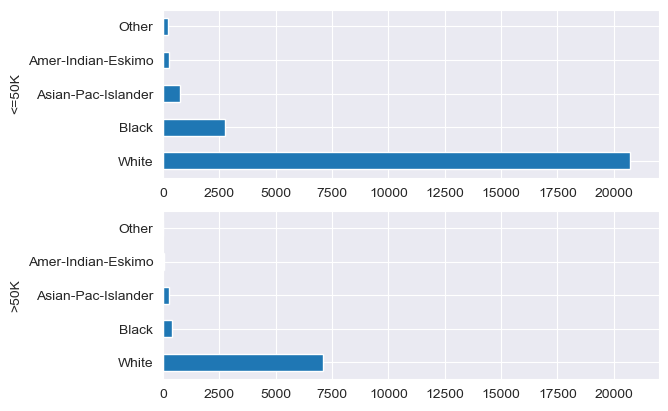

In [59]:
income_possibilities = adult_df.income.unique()

for i,poss in enumerate(income_possibilities):
    plt.subplot(2,1,i+1)
    BM = adult_df.income == poss
    adult_df[BM].race.value_counts().plot.barh()
    plt.xlim([0,22000])
    plt.ylabel(poss)

#### The second way of solving

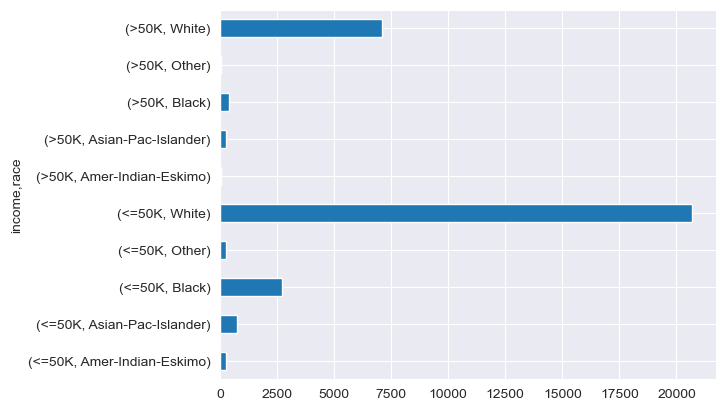

In [60]:
adult_df.groupby(['income','race']).size().plot.barh()
plt.show()

#### The third way of solving

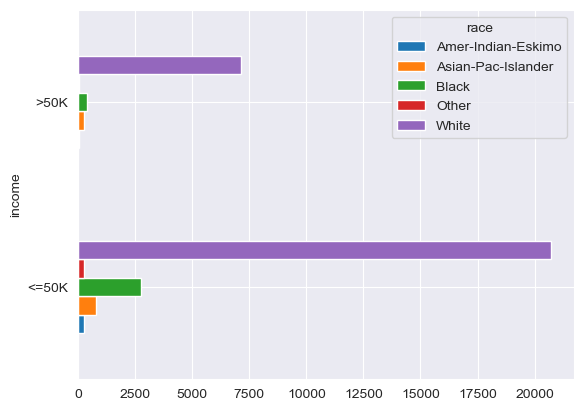

In [61]:
adult_df.groupby(['income','race']).size().unstack().plot.barh()
plt.show()

#### The fourth way of solving

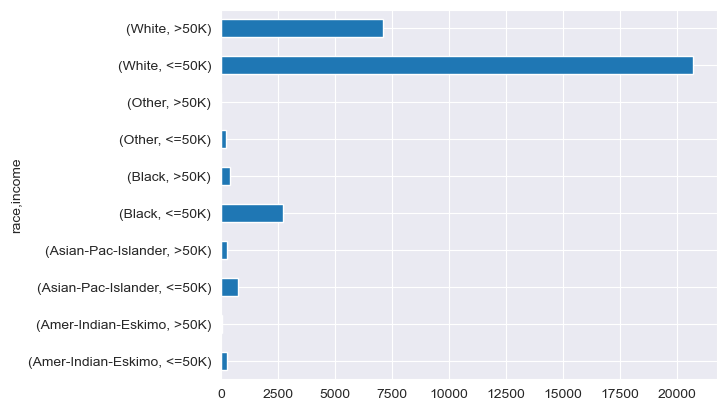

In [62]:
adult_df.groupby(['race','income']).size().plot.barh()
plt.show()

#### The fifth way of solving

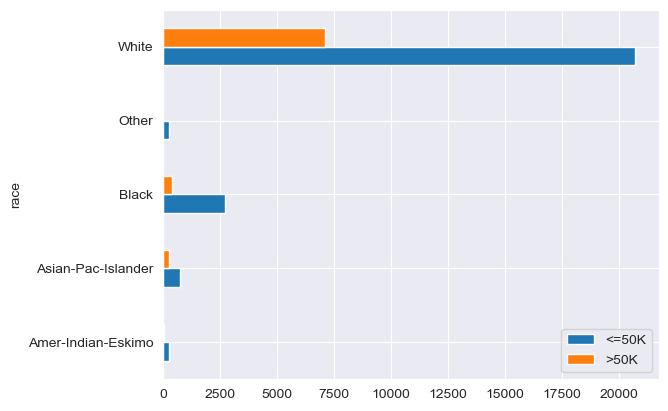

In [63]:
adult_df.groupby(['race','income']).size().unstack().plot.barh()
plt.legend(loc=4)
plt.show()

#### The sixth way of solving

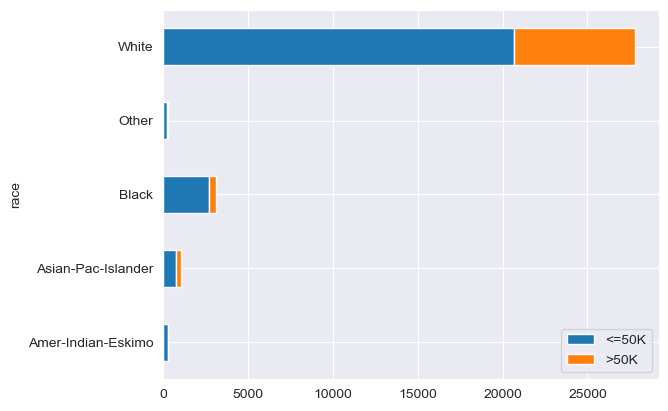

In [65]:
adult_df.groupby(['race','income']).size().unstack().plot.barh(stacked=True)
plt.legend(loc=4)
plt.show()

## Investigating the relationship between two attributes

### Visualizing the relationship between two numerical attributes
#### Example of using scatterplots to investigate between the numerical attributes

/Users/kearney/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


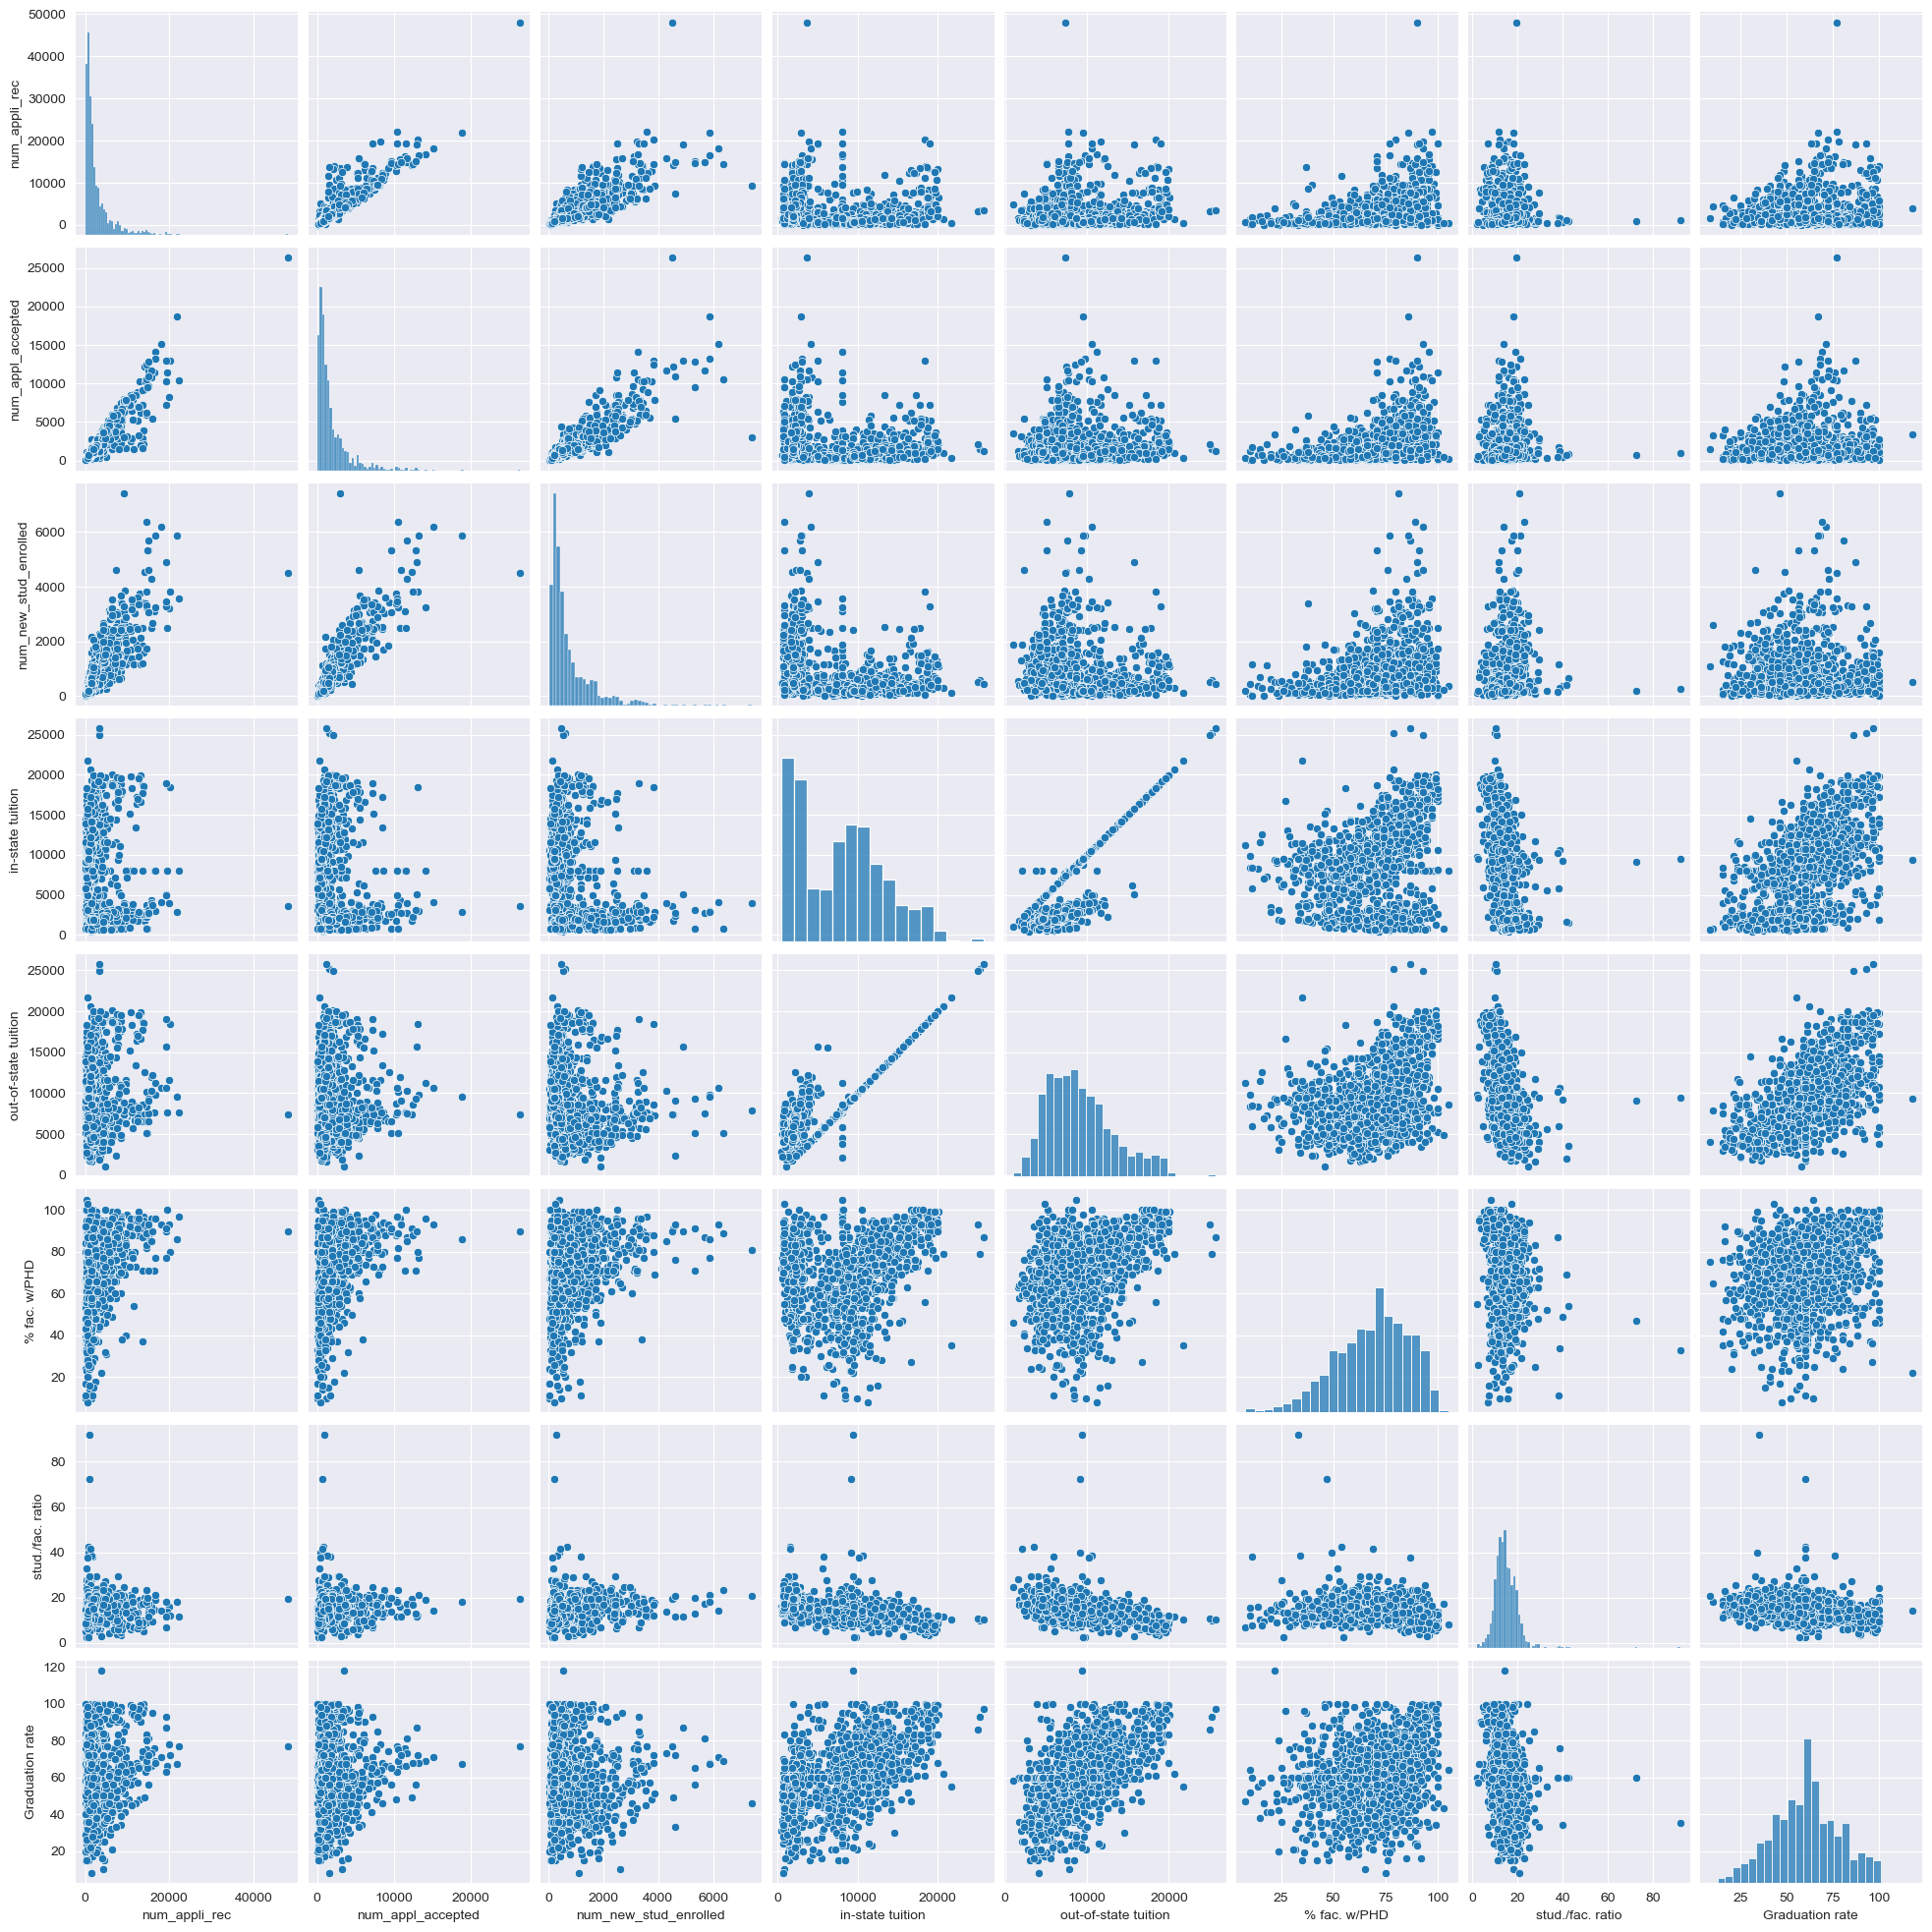

In [66]:
import seaborn as sns
uni_df = pd.read_csv('Universities_imputed_reduced.csv')
sns.pairplot(uni_df)
plt.show()

### Visualizing the relationship between two categorical attributes
#### Example of using contingency table to examine the relationship between two categorical (binary) attributes

In [67]:
contingency_tbl = pd.crosstab(adult_df.income,adult_df.sex)
contingency_tbl

sex,Female,Male
income,,
<=50K,9592,15128
>50K,1179,6662


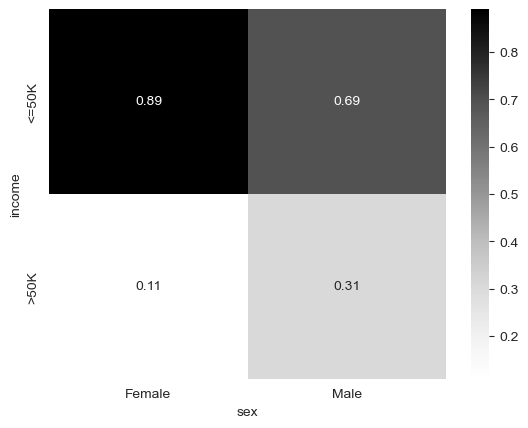

In [69]:
probablity_tbl = contingency_tbl/ contingency_tbl.sum()
sns.heatmap(probablity_tbl, annot=True, center=0.5 ,cmap="Greys")
plt.show()

#### Example of using contingency table to relationship between two categorical (non-binary) attributes

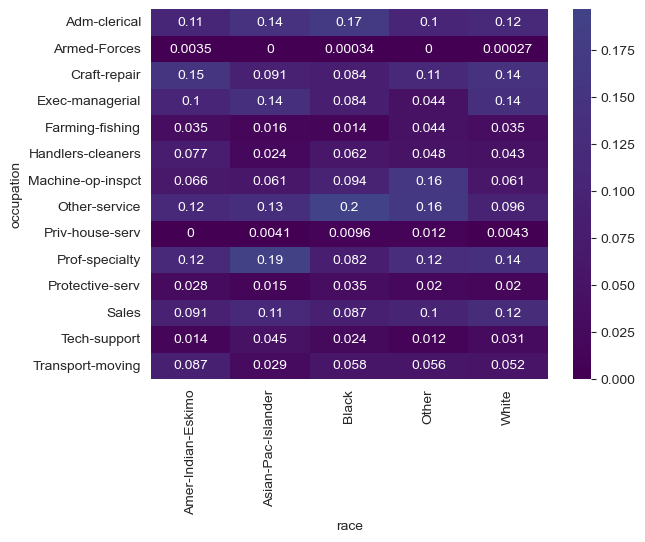

In [74]:
contingency_tbl = pd.crosstab(adult_df.occupation,adult_df.race)
probablity_tbl = contingency_tbl/ contingency_tbl.sum()
sns.heatmap(probablity_tbl, annot=True, center=0.5 ,cmap="viridis")
plt.show()

### Visualizing the relationship between a numerical attribute and a categorical attribute
#### Visualizing the relationship between a numerical attribute and a categorical attribute

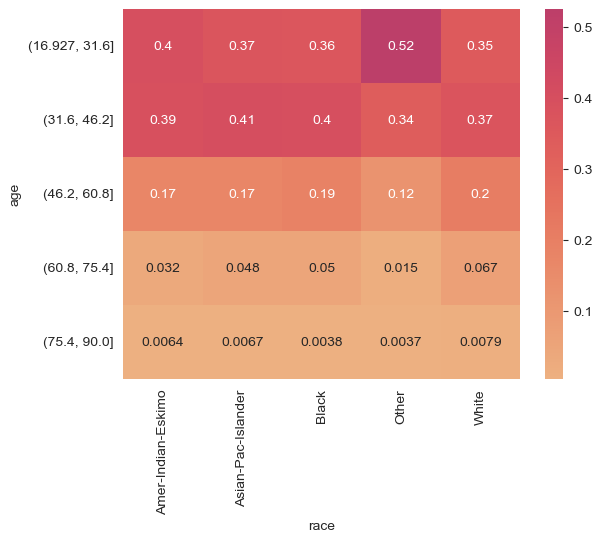

In [79]:
age_discretized = pd.cut(adult_df.age, bins = 5)
contingency_tbl = pd.crosstab(age_discretized,adult_df.race)
probablity_tbl = contingency_tbl/ contingency_tbl.sum()
sns.heatmap(probablity_tbl, annot=True, center=0.5 ,cmap="flare")
plt.show()

#### Another example of examining the relationship between a categorical attribute and a numerical attribute

In [81]:
pd.DataFrame(adult_df.groupby(['education','education-num']).size())

,,0
education,education-num,
10th,6,933
11th,7,1175
12th,8,433
1st-4th,2,168
5th-6th,3,333
7th-8th,4,646
9th,5,514
Assoc-acdm,12,1067
Assoc-voc,11,1382


In [86]:
pd.DataFrame(adult_df.groupby(['education','education-num']).size()).drop(columns=[0])

,
education,education-num
10th,6
11th,7
12th,8
1st-4th,2
5th-6th,3
7th-8th,4
9th,5
Assoc-acdm,12
Assoc-voc,11


In [87]:
pd.DataFrame(adult_df.groupby(['education','education-num']).size()).drop(columns=[0]).reset_index()

,education,education-num
0,10th,6
1,11th,7
2,12th,8
3,1st-4th,2
4,5th-6th,3
5,7th-8th,4
6,9th,5
7,Assoc-acdm,12
8,Assoc-voc,11
9,Bachelors,13


In [88]:
pd.DataFrame(adult_df.groupby(['education','education-num']).size()).drop(columns=[0]).reset_index().sort_values('education-num')

,education,education-num
13,Preschool,1
3,1st-4th,2
4,5th-6th,3
5,7th-8th,4
6,9th,5
0,10th,6
1,11th,7
2,12th,8
11,HS-grad,9
15,Some-college,10


In [91]:
pd.DataFrame(adult_df.groupby(['education','education-num']).size()).drop(columns=[0]).reset_index().sort_values('education-num').reset_index(drop=True)

,education,education-num
0,Preschool,1
1,1st-4th,2
2,5th-6th,3
3,7th-8th,4
4,9th,5
5,10th,6
6,11th,7
7,12th,8
8,HS-grad,9
9,Some-college,10


In [80]:
pd.DataFrame(adult_df.groupby(['education','education-num']).size()).drop(columns=[0]).reset_index().sort_values('education-num').reset_index(drop=True).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
education,Preschool,1st-4th,5th-6th,7th-8th,9th,10th,11th,12th,HS-grad,Some-college,Assoc-voc,Assoc-acdm,Bachelors,Masters,Prof-school,Doctorate
education-num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16


In [92]:
adult_df.groupby(['education','education-num']).size()

education     education-num
10th          6                  933
11th          7                 1175
12th          8                  433
1st-4th       2                  168
5th-6th       3                  333
7th-8th       4                  646
9th           5                  514
Assoc-acdm    12                1067
Assoc-voc     11                1382
Bachelors     13                5355
Doctorate     16                 413
HS-grad       9                10501
Masters       14                1723
Preschool     1                   51
Prof-school   15                 576
Some-college  10                7291
dtype: int64

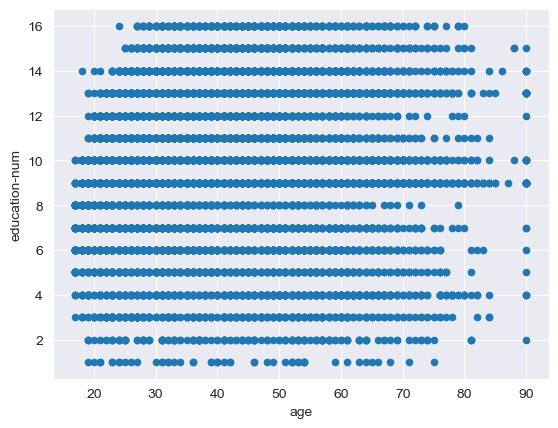

In [93]:
adult_df.plot.scatter(x='age',y='education-num')
plt.show()

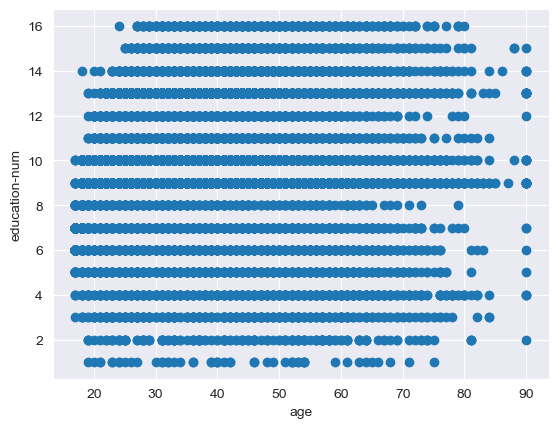

In [114]:
plt.scatter(adult_df['age'],adult_df['education-num'])
plt.xlabel('age')
plt.ylabel('education-num')
plt.show()

In [121]:
adult_df['age'].unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87])

In [122]:
age_discretized = pd.cut(adult_df['age'], bins = 5) #type:pd.Series
age_discretized.rename('age_discretized',inplace=True)

0          (31.6, 46.2]
1          (46.2, 60.8]
2          (31.6, 46.2]
3          (46.2, 60.8]
4        (16.927, 31.6]
              ...      
32556    (16.927, 31.6]
32557      (31.6, 46.2]
32558      (46.2, 60.8]
32559    (16.927, 31.6]
32560      (46.2, 60.8]
Name: age_discretized, Length: 32561, dtype: category
Categories (5, interval[float64, right]): [(16.927, 31.6] < (31.6, 46.2] < (46.2, 60.8] < (60.8, 75.4] < (75.4, 90.0]]

In [123]:
adult_df.education

0         Bachelors
1         Bachelors
2           HS-grad
3              11th
4         Bachelors
            ...    
32556    Assoc-acdm
32557       HS-grad
32558       HS-grad
32559       HS-grad
32560       HS-grad
Name: education, Length: 32561, dtype: object

In [119]:
contingency_tbl = pd.crosstab(adult_df.education,age_discretized)
contingency_tbl

age_discretized,"(16.927, 31.6]","(31.6, 46.2]","(46.2, 60.8]","(60.8, 75.4]","(75.4, 90.0]"
education,,,,,
10th,410,220,207,89,7
11th,663,268,168,70,6
12th,246,107,58,21,1
1st-4th,37,51,50,26,4
5th-6th,96,102,87,41,7
7th-8th,131,143,201,141,30
9th,177,148,119,62,8
Assoc-acdm,369,492,173,29,4
Assoc-voc,430,644,238,64,6


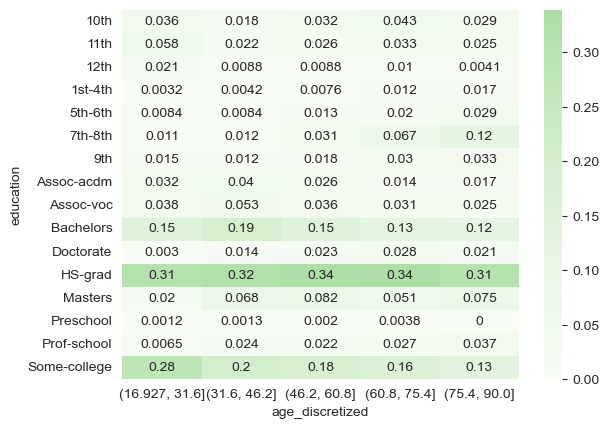

In [124]:
probablity_tbl = contingency_tbl/ contingency_tbl.sum()
sns.heatmap(probablity_tbl, annot=True, center=0.5 ,cmap="Greens")
plt.show()

## Adding visual dimensions

### Example of a 5-dimensional scatterplot

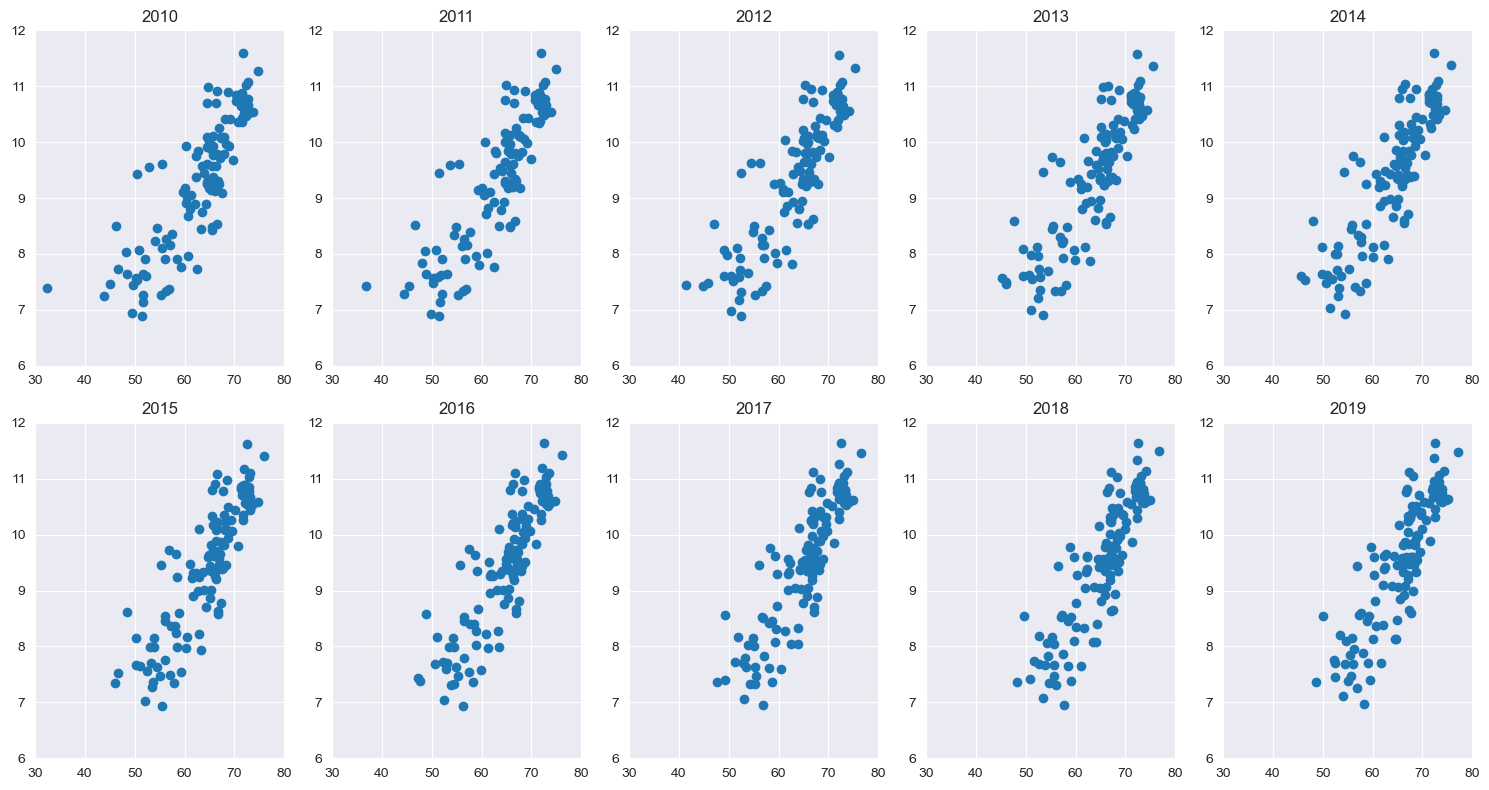

In [126]:
country_df = pd.read_csv('WH Report_preprocessed.csv')
plt.figure(figsize=(15,8)) 

year_poss = country_df.year.unique()

for i,yr in enumerate(year_poss):
    BM = country_df.year == yr
    X= country_df[BM].Healthy_life_expectancy_at_birth
    Y= country_df[BM].Log_GDP_per_capita
    
    plt.subplot(2,5,i+1)
    plt.scatter(X,Y)
    plt.title(yr)
    plt.xlim([30,80])
    plt.ylim([6,12])

plt.tight_layout()
plt.show()

In [133]:
def plotyear(year):
    BM = country_df.year == year
    X= country_df[BM].Healthy_life_expectancy_at_birth
    Y= country_df[BM].Log_GDP_per_capita

    plt.scatter(X,Y)
    plt.xlabel('Healthy_life_expectancy_at_birth')
    plt.ylabel('Log_GDP_per_capita')
    plt.xlim([30,80])
    plt.ylim([6,12])
    plt.show()

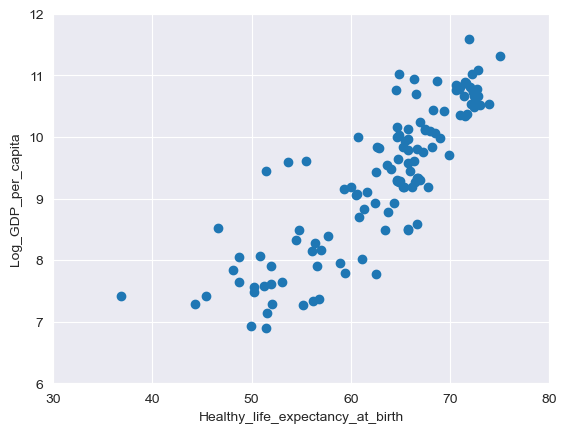

In [134]:
plotyear(2011)

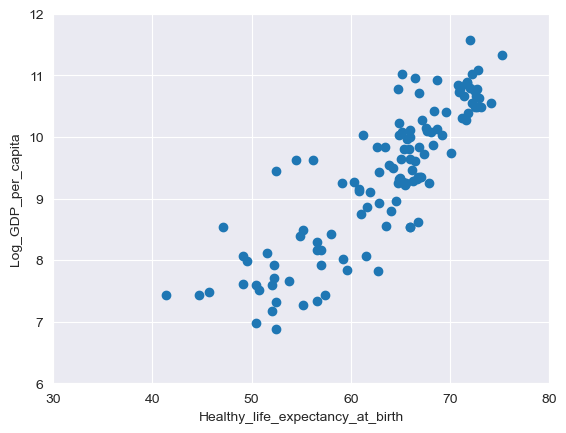

In [135]:
plotyear(2012)

In [136]:
from ipywidgets import interact, widgets

interact(plotyear,year=widgets.IntSlider(min=2010,max=2019,step=1,value=2010))

interactive(children=(IntSlider(value=2010, description='year', max=2019, min=2010), Output()), _dom_classes=(…

<function __main__.plotyear(year)>

#### The fourth dimension

In [148]:
Continent_poss = country_df.Continent.unique()
colors_dic={'Asia':'b', 'Europe':'g', 'Africa':'r', 'South America':'c',
            'Oceania':'m', 'North America':'y', 'Antarctica':'k'}

def plotyear(year):
    for cotinent in Continent_poss:
        BM1 = (country_df.year == year)
        BM2 = (country_df.Continent ==cotinent)
        BM = BM1 & BM2
        X = country_df[BM].Healthy_life_expectancy_at_birth
        Y= country_df[BM].Log_GDP_per_capita
        plt.scatter(X,Y,c=colors_dic[cotinent], marker='o',
                    linewidths=0.5,edgecolors='w',label=cotinent)
        
    plt.xlabel('Healthy_life_expectancy_at_birth')
    plt.ylabel('Log_GDP_per_capita')
    plt.xlim([30,80])
    plt.ylim([6,12])
    plt.legend(ncol=1)
    plt.show()

interact(plotyear,year=widgets.IntSlider(min=2010,max=2019,step=1,value=2010))

interactive(children=(IntSlider(value=2010, description='year', max=2019, min=2010), Output()), _dom_classes=(…

<function __main__.plotyear(year)>

#### The fifth dimension

In [151]:
Continent_poss = country_df.Continent.unique()
colors_dic={'Asia':'b', 'Europe':'g', 'Africa':'r', 'South America':'c',
            'Oceania':'m', 'North America':'y', 'Antarctica':'k'}
country_df.sort_values(['population'],inplace = True, ascending=False)

def plotyear(year):
    for cotinent in Continent_poss:
        BM1 = (country_df.year == year)
        BM2 = (country_df.Continent ==cotinent)
        BM = BM1 & BM2
        size = country_df[BM].population/200000
        X = country_df[BM].Healthy_life_expectancy_at_birth
        Y= country_df[BM].Log_GDP_per_capita
        plt.scatter(X,Y,c=colors_dic[cotinent], marker='o', s=size,
                    linewidths=0.5,edgecolors='w',label=cotinent)
        
    plt.xlabel('Healthy_life_expectancy_at_birth')
    plt.ylabel('Log_GDP_per_capita')
    plt.xlim([30,80])
    plt.ylim([6,12])
    plt.legend(markerscale=0.3, ncol=2)
#     plt.legend(ncol=2)
    plt.show()

interact(plotyear,year=widgets.IntSlider(min=2010,max=2019,step=1,value=2010))

interactive(children=(IntSlider(value=2010, description='year', max=2019, min=2010), Output()), _dom_classes=(…

<function __main__.plotyear(year)>

## Showing and comparing Trends


In [162]:
amazon_df = pd.read_csv('Amazon Stock.csv')
apple_df = pd.read_csv('Apple Stock.csv')
show_table = amazon_df.iloc[5031:5041][['Date','Close']]
show_table.columns = ['Date','Amazon']

In [163]:
show_table

,Date,Amazon
5031,1/2/2020,1898.010010
5032,1/3/2020,1874.969971
5033,1/6/2020,1902.880005
5034,1/7/2020,1906.859985
5035,1/8/2020,1891.969971
5036,1/9/2020,1901.050049
5037,1/10/2020,1883.160034
5038,1/13/2020,1891.300049
5039,1/14/2020,1869.439941
5040,1/15/2020,1862.020020


In [164]:
show_table = show_table.join(apple_df.iloc[5031:5041]['Close'])
show_table

,Date,Amazon,Close
5031,1/2/2020,1898.010010,74.333511
5032,1/3/2020,1874.969971,73.610840
5033,1/6/2020,1902.880005,74.197395
5034,1/7/2020,1906.859985,73.848442
5035,1/8/2020,1891.969971,75.036385
5036,1/9/2020,1901.050049,76.630219
5037,1/10/2020,1883.160034,76.803459
5038,1/13/2020,1891.300049,78.444321
5039,1/14/2020,1869.439941,77.385063
5040,1/15/2020,1862.020020,77.053429


In [165]:
show_table.columns = ['Date','Amazon','Apple']
show_table

,Date,Amazon,Apple
5031,1/2/2020,1898.010010,74.333511
5032,1/3/2020,1874.969971,73.610840
5033,1/6/2020,1902.880005,74.197395
5034,1/7/2020,1906.859985,73.848442
5035,1/8/2020,1891.969971,75.036385
5036,1/9/2020,1901.050049,76.630219
5037,1/10/2020,1883.160034,76.803459
5038,1/13/2020,1891.300049,78.444321
5039,1/14/2020,1869.439941,77.385063
5040,1/15/2020,1862.020020,77.053429


In [166]:
show_table = show_table.transpose()
show_table.columns = show_table.loc['Date']
show_table

Date,1/2/2020,1/3/2020,1/6/2020,1/7/2020,1/8/2020,1/9/2020,1/10/2020,1/13/2020,1/14/2020,1/15/2020
Date,1/2/2020,1/3/2020,1/6/2020,1/7/2020,1/8/2020,1/9/2020,1/10/2020,1/13/2020,1/14/2020,1/15/2020
Amazon,1898.01001,1874.969971,1902.880005,1906.859985,1891.969971,1901.050049,1883.160034,1891.300049,1869.439941,1862.02002
Apple,74.333511,73.61084,74.197395,73.848442,75.036385,76.630219,76.803459,78.444321,77.385063,77.053429


In [167]:
show_table.drop(index=['Date'])

Date,1/2/2020,1/3/2020,1/6/2020,1/7/2020,1/8/2020,1/9/2020,1/10/2020,1/13/2020,1/14/2020,1/15/2020
Amazon,1898.01001,1874.969971,1902.880005,1906.859985,1891.969971,1901.050049,1883.160034,1891.300049,1869.439941,1862.02002
Apple,74.333511,73.61084,74.197395,73.848442,75.036385,76.630219,76.803459,78.444321,77.385063,77.053429


### Example of visualizing and comparing trends

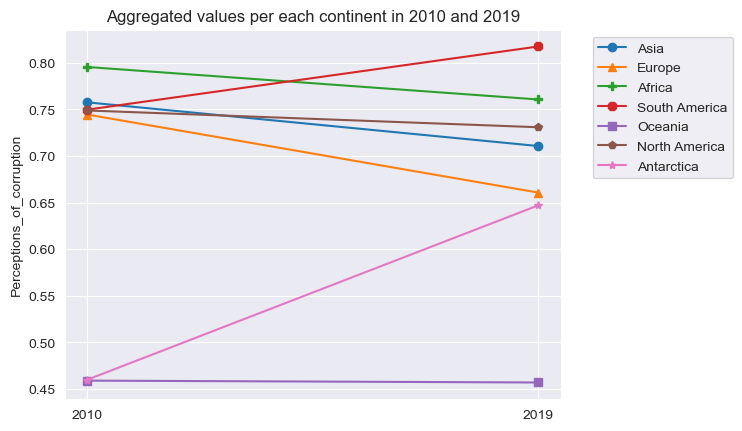

In [176]:
country_df = pd.read_csv('WH Report_preprocessed.csv')
continent_poss = country_df.Continent.unique()
byContinentYear_df = country_df.groupby(['Continent','year']).Perceptions_of_corruption.mean()
Markers_options = ['o', '^','P', '8', 's', 'p', '*']

for i,c in enumerate(continent_poss):
    plt.plot([2010,2019],byContinentYear_df.loc[c,[2010,2019]],
             label=c,marker=Markers_options[i])
plt.xticks([2010,2019])
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title('Aggregated values per each continent in 2010 and 2019')
plt.ylabel('Perceptions_of_corruption')
plt.show()